# Creating Bike and Pedestrian Skims from Open Street Map Linework

For environment see: https://github.com/gboeing/osmnx 

    conda config --prepend channels conda-forge
    
    conda create -n ox --strict-channel-priority osmnx
    
* also include nb_conda, nb_conda_kernels, and ipykernel

In [73]:
import geopandas as gpd
import osmnx
import pandas as pd
import networkx as nx

## Prepare Data for Routing

In [13]:
#import TAZs
tazs = gpd.read_file('C:/Users/phoebe/Bike_Ped_Skims_OSM/candidate_CTPS_TAZ_STATEWIDE_2019.geojson')

In [5]:
#import mpo
mpo = gpd.read_file('//lilliput/matkinson/JupyterHome/JupyterNotebooks/Ped_Bike_Skims_OSM/Ped_Bike_Skims_OSM/MPO_Polygon.shp')

In [14]:
#set the projected crs
tazs = tazs.to_crs('EPSG:26986')

In [15]:
#boundaries for TAZ
states = tazs.dissolve(by='state')

<AxesSubplot:>

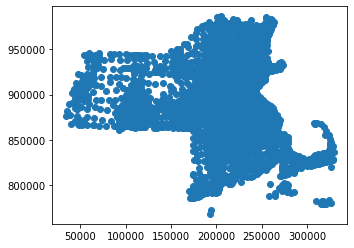

In [16]:
#centroids of TAZs
centroids = tazs.copy(deep=True)
centroids.geometry = centroids.centroid

<AxesSubplot:>

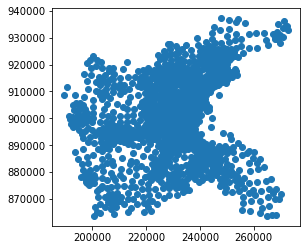

In [17]:
#clip TAZ centroids to MPO polygon
mpo_cen = gpd.clip(centroids, mpo, keep_geom_type = True)

### Load Networks from Disk 
Only available if have run the section 'Run ONLY if Changing Study Area'

In [10]:
bike_net = osmnx.load_graphml('E:/Shared drives/TMD_TSA/Data/Non_Motorized_Networks/bike_net_MPO2.graphml')
bike_net = osmnx.project_graph(bike_net, to_crs = 'EPSG:26986')

In [11]:
ped_net = osmnx.load_graphml('E:/Shared drives/TMD_TSA/Data/Non_Motorized_Networks/ped_net_MPO2.graphml')
ped_net = osmnx.project_graph(ped_net, to_crs = 'EPSG:26986')

### Look at Networks

In [20]:
#turn to gdf to see the attributes (tags) on the links
bike_edges = osmnx.utils_graph.graph_to_gdfs(bike_net, nodes = False, edges = True,
                                             node_geometry = False, fill_edge_geometry = False)

#big table, lets see a bit more than default
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

bike_edges.head()

osmid oneway lanes  \
u          v          key                                                 
61283119   61283126   0                            8615341   True     1   
           61321743   0                            8616058  False     2   
           61283322   0                            8616167   True     1   
61283126   61321144   0                            8615341   True     1   
           6758780152 0                            8615430  False     1   
...                                                    ...    ...   ...   
9170677366 72798487   0                          298681627  False     2   
9181072690 69231524   0      [71374009, 71374010, 9251027]  False     2   
           69214105   0                            9251027  False     2   
           1315623184 0             [993752012, 601847572]  False   NaN   
           328592069  0    [8842504, 993752012, 822071696]  False   NaN   

                                             name      highway maxspeed  \
u          v          key                                                 
61283119   61283126   0          Brookline Street     tertiary   25 mph   
           61321743   0              Henry Street  residential   25 mph   
           61283322   0              Henry Street  residential   25 mph   
61283126   61321144   0          Brookline Street     tertiary   25 mph   
           6758780152 0           Chestnut Street  residential   25 mph   
...                                           ...          ...      ...   
9170677366 72798487   0           Railroad Avenue  residential   20 mph   
9181072690 69231524   0             Newton Street    secondary      NaN   
           69214105   0             Newton Street    secondary      NaN   
           1315623184 0    Charles River Greenway     cycleway      NaN   
           328592069  0    Charles River Greenway     cycleway      NaN   

                           surface    length  \
u          v          key                      
61283119   61283126   0    asphalt   105.188   
           61321743   0    asphalt   136.016   
           61283322   0    asphalt    44.369   
61283126   61321144   0    asphalt   102.839   
           6758780152 0    asphalt    37.569   
...                            ...       ...   
9170677366 72798487   0        NaN    62.686   
9181072690 69231524   0    asphalt   140.714   
           69214105   0        NaN    31.047   
           1315623184 0      paved  1125.271   
           328592069  0      paved   314.082   

                                                                    geometry  \
u          v          key                                                      
61283119   61283126   0    LINESTRING (-71.10958 42.35590, -71.10950 42.3...   
           61321743   0    LINESTRING (-71.10958 42.35590, -71.10949 42.3...   
           61283322   0    LINESTRING (-71.10958 42.35590, -71.10966 42.3...   
61283126   61321144   0    LINESTRING (-71.10879 42.35665, -71.10875 42.3...   
           6758780152 0    LINESTRING (-71.10879 42.35665, -71.10875 42.3...   
...                                                                      ...   
9170677366 72798487   0    LINESTRING (-71.28728 42.48886, -71.28761 42.4...   
9181072690 69231524   0    LINESTRING (-71.22889 42.37229, -71.22887 42.3...   
           69214105   0    LINESTRING (-71.22889 42.37229, -71.22890 42.3...   
           1315623184 0    LINESTRING (-71.22889 42.37229, -71.22884 42.3...   
           328592069  0    LINESTRING (-71.22889 42.37229, -71.22894 42.3...   

                          width cycleway  ref sidewalk junction bridge  \
u          v          key                                                
61283119   61283126   0     NaN      NaN  NaN      NaN      NaN    NaN   
           61321743   0    12.2      NaN  NaN      NaN      NaN    NaN   
           61283322   0    12.2      NaN  NaN      NaN      NaN    NaN   
61283126   61321144   0     NaN      NaN  NaN      NaN      NaN  

In [44]:
#turn to gdf to see the attributes (tags) on the links
ped_edges = osmnx.utils_graph.graph_to_gdfs(ped_net, nodes = False, edges = True,
                                             node_geometry = False, fill_edge_geometry = False)

ped_edges.head()

osmid  oneway lanes              name  \
u          v          key                                              
61283119   7870841845 0      8615341   False     1  Brookline Street   
           7870841839 0      8615341   False     1  Brookline Street   
           7870841842 0      8616058   False     2      Henry Street   
           7870841836 0      8616167   False     1      Henry Street   
61283126   7870841850 0      8615341   False     1  Brookline Street   
...                              ...     ...   ...               ...   
9170677372 9170677373 0    992587135   False   NaN               NaN   
9170677373 9170677372 0    992587135   False   NaN               NaN   
           4360496423 0    992587135   False   NaN               NaN   
           4899838404 0    498596082   False   NaN               NaN   
           4899838413 0    498596082   False   NaN               NaN   

                               highway maxspeed  surface   length width  \
u          v          key                                                 
61283119   7870841845 0       tertiary   25 mph  asphalt   10.223   NaN   
           7870841839 0       tertiary   25 mph  asphalt    7.070   NaN   
           7870841842 0    residential   25 mph  asphalt    8.983  12.2   
           7870841836 0    residential   25 mph  asphalt    8.044  12.2   
61283126   7870841850 0       tertiary   25 mph  asphalt    5.289   NaN   
...                                ...      ...      ...      ...   ...   
9170677372 9170677373 0        footway      NaN      NaN    1.960   NaN   
9170677373 9170677372 0        footway      NaN      NaN    1.960   NaN   
           4360496423 0        footway      NaN      NaN    7.689   NaN   
           4899838404 0        footway      NaN      NaN   51.979   NaN   
           4899838413 0        footway      NaN      NaN  102.654   NaN   

                          cycleway  ref sidewalk  \
u          v          key                          
61283119   7870841845 0        NaN  NaN      NaN   
           7870841839 0        NaN  NaN      NaN   
           7870841842 0        NaN  NaN      NaN   
           7870841836 0        NaN  NaN      NaN   
61283126   7870841850 0        NaN  NaN      NaN   
...                            ...  ...      ...   
9170677372 9170677373 0        NaN  NaN      NaN   
9170677373 9170677372 0        NaN  NaN      NaN   
           4360496423 0        NaN  NaN      NaN   
           4899838404 0        NaN  NaN      NaN   
           4899838413 0        NaN  NaN      NaN   

                                                                    geometry  \
u          v          key                                                      
61283119   7870841845 0                                                 None   
           7870841839 0                                                 None   
           7870841842 0                                                 None   
           7870841836 0                                                 None   
61283126   7870841850 0                                                 None   
...                                                                      ...   
9170677372 9170677373 0                                                 None   
9170677373 9170677372 0                                                 None   
           4360496423 0                                                 None   
           4899838404 0    LINESTRING (-71.28642 42.48871, -71.28632 42.4...   
           4899838413 0    LINESTRING (-71.28642 42.48871, -71.28657 42.4...   

                            footway junction service bridge access smoothness  \
u          v          key                                                       
61283119   7870841845 0         NaN      NaN     NaN    NaN    NaN        NaN   
           7870841839 0         NaN      NaN     NaN    NaN    NaN        NaN   
           7870841842 0         NaN      NaN     NaN    NaN    NaN        Na

In [65]:
#As a note - sidewalks are not consistently coded, so after a brief assessment using
# https://wiki.openstreetmap.org/wiki/Map_features#Highway and looking at the data,
# this seems adequate. Worth an additional conversation, just not the priority at the moment.

#list means its been simplified by default via osmnx download

ped_edges['highway'].explode().unique()
print(ped_edges['highway'].value_counts())

service                                335272
residential                            260062
footway                                166078
secondary                               78810
tertiary                                62680
                                        ...  
[path, steps, footway, residential]         1
[path, residential, steps, footway]         1
[service, secondary_link]                   1
[primary_link, secondary]                   1
[secondary, primary_link]                   1
Name: highway, Length: 113, dtype: int64


In [64]:
#So footways tend to exclude bikes and cycleways really tend to exclude pedestrians. 
# Same as above.
bike_edges['highway'].explode().unique()
print(bike_edges['highway'].value_counts())

service                                        304471
residential                                    226862
secondary                                       67589
tertiary                                        53575
path                                            39349
primary                                         13166
track                                            8831
cycleway                                         4889
unclassified                                     4766
[service, residential]                           3379
trunk                                            2456
[path, residential]                               910
trunk_link                                        696
secondary_link                                    601
[service, path]                                   481
pedestrian                                        423
[track, residential]                              372
[service, track]                                  330
tertiary_link               

## Routing For Skims


In [52]:
#get the closest nodes to o's and d's so can use for routing

#copy taz centroids to start 
ods = mpo_cen.copy(deep=True)

#get x and y values
ods_X = mpo_cen.geometry.x.values
ods_Y = mpo_cen.geometry.y.values

#closest nodes on bike and ped networks 
bike_nodes, bike_dists = osmnx.nearest_nodes(bike_net, ods_X, ods_Y, return_dist=True)
ped_nodes, ped_dists = osmnx.nearest_nodes(ped_net, ods_X, ods_Y, return_dist=True)


In [ ]:
#impedence fxn
#https://github.com/gboeing/osmnx-examples/blob/main/notebooks/12-node-elevations-edge-grades.ipynb

In [71]:
#apply impedence


1930

### For Skimming:
To get skims (all origins to all destinations) - you need to provide all of the OD pairs to be run. So for every origin, we need len(nodes) pairs (including itself). The section below creates the infrastructure for the pairs.

In [72]:
def _single_shortest_path_length(G, orig, dest, weight):
    """
    Solve the shortest path from an origin node to a destination node.
    This function is a convenience wrapper around networkx.shortest_path, with
    exception handling for unsolvable paths.
    Parameters
    ----------
    G : networkx.MultiDiGraph
        input graph
    orig : int
        origin node ID
    dest : int
        destination node ID
    weight : string
        edge attribute to minimize when solving shortest path
    Returns
    -------
    path : list
        list of node IDs constituting the shortest path
    """
    try:
        return nx.shortest_path_length(G, orig, dest, weight=weight)
    except nx.exception.NetworkXNoPath:  # pragma: no cover
        utils.log(f"Cannot solve path from {orig} to {dest}")
        return None


def shortest_path_length(G, orig, dest, weight="length", cpus=1):
    """
    Solve shortest path from origin node(s) to destination node(s).
    If `orig` and `dest` are single node IDs, this will return a list of the
    nodes constituting the shortest path between them.  If `orig` and `dest`
    are lists of node IDs, this will return a list of lists of the nodes
    constituting the shortest path between each origin-destination pair. If a
    path cannot be solved, this will return None for that path. You can
    parallelize solving multiple paths with the `cpus` parameter, but be
    careful to not exceed your available RAM.
    See also `k_shortest_paths` to solve multiple shortest paths between a
    single origin and destination. For additional functionality or different
    solver algorithms, use NetworkX directly.
    Parameters
    ----------
    G : networkx.MultiDiGraph
        input graph
    orig : int or list
        origin node ID, or a list of origin node IDs
    dest : int or list
        destination node ID, or a list of destination node IDs
    weight : string
        edge attribute to minimize when solving shortest path
    cpus : int
        how many CPU cores to use; if None, use all available
    Returns
    -------
    path : list
        list of node IDs constituting the shortest path, or, if orig and dest
        are lists, then a list of path lists
    """
    if not (hasattr(orig, "__iter__") or hasattr(dest, "__iter__")):
        # if neither orig nor dest is iterable, just return the shortest path
        return _single_shortest_path_length(G, orig, dest, weight)

    elif hasattr(orig, "__iter__") and hasattr(dest, "__iter__"):
        # if both orig and dest are iterables ensure they have same lengths
        if len(orig) != len(dest):  # pragma: no cover
            raise ValueError("orig and dest must contain same number of elements")

        if cpus is None:
            cpus = mp.cpu_count()
        utils.log(f"Solving {len(orig)} paths with {cpus} CPUs...")

        if cpus == 1:
            # if single-threading, calculate each shortest path one at a time
            paths = [_single_shortest_path(G, o, d, weight) for o, d in zip(orig, dest)]
        else:
            # if multi-threading, calculate shortest paths in parallel
            args = ((G, o, d, weight) for o, d in zip(orig, dest))
            pool = mp.Pool(cpus)
            sma = pool.starmap_async(_single_shortest_path_length, args)
            paths = sma.get()
            pool.close()
            pool.join()

        return paths

    else:
        # if only one of orig or dest is iterable and the other is not
        raise ValueError("orig and dest must either both be iterable or neither must be iterable")


In [ ]:
def makeSkim(ods, network):
    #initialize output skim columns
    skim = pd.DataFrame(columns=ods)
    for o in ods:
        #repeat origin node for pairs with all ods
        origin = [o]*len(ods)
        #get route lengths
        routes = shortest_path_length(network, origin, ods, weight="length", cpus=60)
        #append route lengths to skim table
        skim.loc[o] = routes
    return skim   
        
        

In [56]:
%%time
#routing with multiprocessing
#bike_routes = osmnx.shortest_path(bike_net, bike_nodes, bike_nodes, weight="length", cpus=60)
bike_skim = makeSkim(bike_nodes, bike_net)

Wall time: 48min 29s


In [63]:
%%time
ped_routes = osmnx.shortest_path(ped_net, ped_nodes, ped_nodes, weight="length", cpus=60)

Wall time: 1h 24s


## Run ONLY if Changing Study Area

In [3]:
#update the attributes retrieved from OSM in settings.py
useful_tags_path = ['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name',
                    'highway', 'maxspeed', 'service', 'access', 'area',
                    'landuse', 'width', 'est_width', 'junction', 
                    'surface', 'smoothness','cycleway', 'footway', 'sidewalk']
osmnx.utils.config(useful_tags_way = useful_tags_path)

In [6]:
#grab from OSM the bike and pedestrian networks for the MPO
#WARNING: Takes 48 hours to run (for both bike and ped together)
bike_net = osmnx.graph_from_polygon(mpo.to_crs('EPSG:4326').unary_union, network_type='bike')
#ped_net = osmnx.graph_from_polygon(mpo.to_crs('EPSG:4326').unary_union, network_type='walk')

In [8]:
#Save to Disk (Bike)
filepath = "//lilliput/matkinson/JupyterHome/JupyterNotebooks/Ped_Bike_Skims_OSM/bike_net_MPO.graphml"
osmnx.save_graphml(bike_net, filepath)


In [9]:
ped_net = osmnx.graph_from_polygon(mpo.to_crs('EPSG:4326').unary_union, network_type='walk')

In [10]:
#Save to Disk (Ped)
filepath = "//lilliput/matkinson/JupyterHome/JupyterNotebooks/Ped_Bike_Skims_OSM/ped_net_MPO.graphml"
osmnx.save_graphml(ped_net, filepath)

## Not Used - but Useful Snippets

<AxesSubplot:>

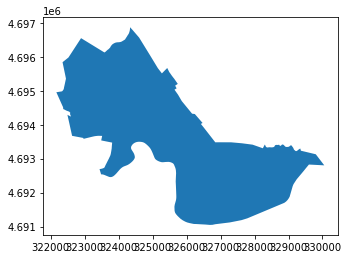

In [6]:
cambridge = osmnx.geocode_to_gdf('Cambridge, Massachusetts')
osmnx.project_gdf(cambridge).plot()